In [8]:
from matplotlib import pyplot as plt
import numpy as np

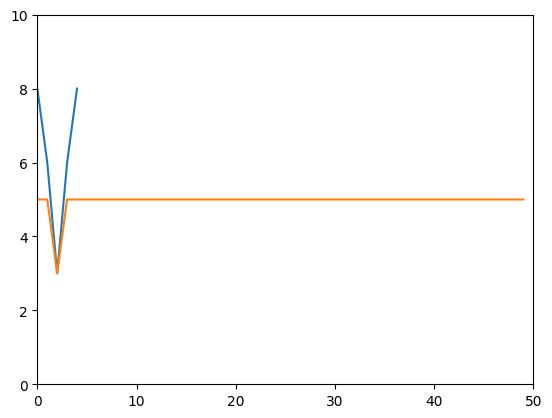

In [53]:
class Vector2:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Vector3:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __add__(self, other):
        return Vector3(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def __sub__(self, other):
        return Vector3(self.x - other.x, self.y - other.y, self.z - other.z)
    
    def __mul__(self, other):
        return Vector3(self.x * other, self.y * other, self.z * other)
    
    def __truediv__(self, other):
        return Vector3(self.x / other, self.y / other, self.z / other)

    def __repr__(self):
         return f"Vector3({self.x}, {self.y}, {self.z})"

# a workpiece is cylinder defined by its length and radius
class Workpiece:
    def __init__(self, length: int, radius: float):
        self.length = length
        self.radius = radius
        self.array = []
        for i in range(0, length):
            self.array.append(self.radius)
    
    def visualize(self):
        plt.plot(self.array)
        plt.xlim(0, self.length)
        plt.ylim(0, self.radius * 2)

# point is the index of the slice, depth the y-coordinate of the cut
    def cut(self, point: int, depth: float):
        self.array[point] = depth

# cut to the same depth at multiple points
# points: (from: inclusive, to: exclusive)
    def cut_multiple(self, points: list[int, int], depth: float):
        for point in range(points[0], points[1] - 1):
            self.cut(point, depth)

# position is left top corner
# form is a list of floats (index is x-coordinate, value is cut-depth)
class Tool:
    def __init__(self, position: Vector2, form: list[float]):
        self.position = position
        self.raw_form = form

    def move(self, movement: Vector2):
        self.position += movement

    def visualize(self):
        form = self.raw_form
        for i in range(0, self.position.x): form.insert(0, 0)
        for i, _ in enumerate(form): form[i] = self.position.y - form[i]
        plt.plot(form)

wp = Workpiece(50, 5)
wp.cut_multiple((2, 4), 3)

tl = Tool(Vector2(0, 9), [1, 3, 6, 3, 1])

tl.visualize()
wp.visualize()
plt.show()